# Approximating Pi in Python

## Introduction

This is an example of working in Python using Jupyter Notebooks continuing from our classroom example with our classic pi case.

This is presented in "notebook" form which lets you share the not just the code but also traditional text in the form of "[Markdown](https://nbviewer.jupyter.org/github/jrjohansson/numerical-python-book-code/blob/master/ch01-Markdown.ipynb)."   More importantly, this lets us "serve" this document online as an HTML web document.  R (using RStudio) and MATLAB has similar functionality.

The numbered "cells" below are code in the Jupyter notebook.  The language can be in a number of languages but Python tends to be the most common programming environment.  The un-numbered areas are text comments and also model output (you can tell by the difference in the fonts).  Also inside the grey "code" area are comments shown in green with the "#" signs.

We also will demonstrate a more detailed form of text output where you can control the number of significant figures.  

If you haven't had a formal computer programming class don't panic here.  From Lecture 2 (Pseudocode), you saw that programming structures in different languages tend to have a similar "look-n-feel" or at least are marginally intuitive.  Try to follow along and focus on what is familiar.

And away we go!  


## Math Behind Approximating Pi

Our approximation method here is based on the arctangent function:

$$\pi =\int^{1}_{0} \frac{4}{1+x^2} dx = 4\arctan1.0 $$

We wish to approximate this relationship using Reimann sums, shown here: 

![PI Reimann Sum](http://kyrill.ias.sdsmt.edu/wjc/eduresources/PI_Integration_Figure.png)

Doing this we discretize the above integral formula so that for an increment of $\Delta x = 1/N$,

$$\pi =\frac{1}{N}\sum_{i=1}^{N}   \frac{4}{1+x^2}$$

## Coding this in Python 3

When implementing this in raw basic Python, we have a few things to accommodate for people who are used to other traditional languages like C or Fortran.

Unlike more hardcore and sophisticated forays in to Python.  The code block below shows nothing but the most basic of math operations and loops in Python.  Nothing beyond the most standard math operators (no trig functions for example).  Nothing other than a very simple counting loop over a range of numbers.  

### Math Operators

Out the gate, we need to know the basic operators.  

The traditional arithmetic ones are as they are in most other computing environments. +, -, *, / are pretty intuitive.

The upper-level operators however, not so much:

* % is the modulus operator (returning the "remainder" from division).

* // is the floor division symbol.  which goes with the modulator.   (10 // 3 & 10 % 3 give you 3 and 1 (or 10/3 = 3r1 when taken together, 

* ** is used to represent raising a value to a power. (This actually goes back to the golden days of programming when the top row of the number rows didn't always have a "^".

### A heads up on loops and "ranges"

In the loop demonstrated below there is a quirk in python that we don't see in other languages.  This is discussed in cheeky detail at the end of this discussion.  But the [tl;dr](https://en.wiktionary.org/wiki/tl;dr#English) form of it is that when we cite "ranges" of numbers in Python, the start number we use for the range is *inclusive* and the end number we use for a range is *exclusive* (the next number AFTER the range is done).  It's weird and it's the hardest thing I've had to wrap my head around when working with Python.



In [1]:
#############################################
#
# Integrating Pi Using Raw Python (Version 3)
#
# Programming Notes for Beginners: 
#
#   1) Loops.  In python loops and other structures
#      are tab-intented with the end of the loop being
#      marked, not by an "end for" or similar cue
#      but just an end of the intenting.
#
#   2) Ranges in Python are wierd compared to more 
#      traditional languates like Fortran, C or 
#      newer languages like R.
#
#      The first value in a range is "inclusive"
#         which in the example below has it starting
#         at one.
#
#      The last value in a range (we want it to be "N")
#        is *exclusive* meaning that that it will want the
#        value at the *end* of the range - which is N+1 and 
#        *** NOT *** "N"  (yes, I think it's dumb too.)
#
#       I have a section below "deep-diving" into this quirk
#
#   3) in raw python, exponents are given in 
#      "Fortran-style" using two "**'s" rather
#      than a single "^" as you see in newer languages
#      languages like R, MATLAB, and Excel.
#

N  = 8
h  = 1.0 / N
pi = 0.0

for n in range(1, N+1, 1):  # remember that second range value is the first integer OUTSIDE of the acutal range.  
    x  = h * (n - 0.5)
    pi = pi + 4.0 * h / (1.0 + x**2) 
    print("n=", n, "; x = ", x,  "; pi=", pi)

#
#############################################

n= 1 ; x =  0.0625 ; pi= 0.4980544747081712
n= 2 ; x =  0.1875 ; pi= 0.9810733426326995
n= 3 ; x =  0.3125 ; pi= 1.436589356867575
n= 4 ; x =  0.4375 ; pi= 1.8562614880151158
n= 5 ; x =  0.5625 ; pi= 2.2360834464720893
n= 6 ; x =  0.6875 ; pi= 2.5756059928911874
n= 7 ; x =  0.8125 ; pi= 2.876782463479423
n= 8 ; x =  0.9375 ; pi= 3.142894729591689



Now we are going to get fancy!

## Libraries

When working with Python you have access to a large number of libraries with specific tools.  Some of used by a large number of communities.  (We'll be focusing on these.)  Others are highly specialized.

We can also do this and place our results into an array for printing.  For this we will need two new "libraries" to do this.  

This is also where things get... "interesting."

The first library we'll explore is "'numerical' Python" or ["numpy"](https://www.numpy.org/doc/1.17/reference/index.html) which has a number of tools to do basic number-Fu such as arrays and certain numerical functions, including basic trig and math functions.

The other is the [matplotlib](https://matplotlib.org) library which includes resources for making basic graphs.  If you've worked with MATLAB you will have a sense of déjà vu.  This library leverages a LOT of MATLAB's plotting syntax.

One thing that often confuses beginners in Python is that libraries in Python need to be imported and it's often seen as good practice to make sure that you import them "as" an identifier "variable" such as shown below.  (This will let a user know that what you are using is not intrinsic to the basic core of Python.



In [2]:
#############################################
#
# Load Python Libraries 
#
# I'm breaking my normal swing of things and not
#   putting library imports at the top where I 
#   like them
#

import numpy                as np
import matplotlib.pyplot    as plt

#
#############################################


## Playing with numpy


Let's start small:

To invoke a one of these functions we need to use the identifier variable (e.g., np).  For example to calculate atan(1), we would do the following.


In [3]:
#############################################
#
# Calling a math function with numpy...
#

print(np.arctan(1.0))

#
#############################################

0.7853981633974483


(which if you remember is a quarter of $\pi$)

In [4]:
#############################################
#
# Making PI with numpy
#

print(4*np.arctan(1.0))

#
#############################################

3.141592653589793


(and while we're here -- and we're kind of throwing the game given what we're trying to demonstrate here -- we also have some classic constants that are available to us)

In [5]:
#############################################
#
# Calling PI and "e" as constants with numpy
#

print(np.pi) # pi

print(np.e)  # e 

#
#############################################

3.141592653589793
2.718281828459045


### Arrays in Python using Numpy (Part 1 : Making arrays)

But here with numpy, what we want to do is create an "empty" or "zero'ed" 1-d array (or "vector") to contain our answers to PI as calcualted using various integrals of our above case example.

This uses a function called [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html).

For example let's make an empty array of 20 elements and populating them with zeros.


In [6]:
#############################################
#
# Create an vector 20-cells long and put zeros 
#   in all the slots
#

pi_of_N = np.zeros(20) 

print(pi_of_N)

#
#############################################

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


We also can create an array that goes from one value to another in equal intervals with [nd.arrange]

(And while we're here, we index arrays in Python starting with 0.)

Also as before the example below creates an array from 1 to 20 (not 21).

In [7]:
#############################################
#
# Create an vector 20-cells long and put a 
#    consecutive range of intergers in them
#

Ns_for_pi = np.arange(1, 21, 1) # the range works the 

print(Ns_for_pi)

# also now that we are working with indexes in arrays
#   as we earned with Mathcad, we might want to see 
#   if indexing starts at 0 or 1.

# Spoilers: it's zero!

print(Ns_for_pi[1]) 

print(Ns_for_pi[0])

#
#############################################

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
2
1


# Using these arrays to make a plot of PI as a function of different numbers of Reimann Sums

This will let us create a lasting record of how the calculation of $\pi$ changes as we make tinier 
and tinier little boxes in our Reimann sums.

Also look at that reference *after* the Ns_for_pi on the first line.

*.size will get the size of whatever array you're asking about.

Also fun fact:  Python is case-sensitive.  This means that you can have a variable called "n" and another variable called "N."

Now let's visit our earlier script.  

In [8]:
#############################################
#
# Creating A Nested Loop Ensemble for Calculating
#   PI with different numbers of iterations
#

print("Number of Elements Ns_for_pi: ",Ns_for_pi.size)
print("")

for N in range(0, Ns_for_pi.size, 1): 
    
    h  = 1.0 / Ns_for_pi[N]
    pi = 0.0

    for n in range(1, Ns_for_pi[N] + 1, 1):  
        x  = h * (n - 0.5)
        pi = pi + 4.0 * h / (1.0 + x**2) 

        
    print("N=", Ns_for_pi[N],"; pi=", pi)

    pi_of_N[N] = pi
    

#
#############################################

Number of Elements Ns_for_pi:  20

N= 1 ; pi= 3.2
N= 2 ; pi= 3.1623529411764704
N= 3 ; pi= 3.150849209865603
N= 4 ; pi= 3.1468005183939427
N= 5 ; pi= 3.144925864003328
N= 6 ; pi= 3.143907427222438
N= 7 ; pi= 3.143293317527468
N= 8 ; pi= 3.142894729591689
N= 9 ; pi= 3.1426214565576127
N= 10 ; pi= 3.142425985001098
N= 11 ; pi= 3.1422813577390007
N= 12 ; pi= 3.1421713566497966
N= 13 ; pi= 3.142085749838525
N= 14 ; pi= 3.1420178234025458
N= 15 ; pi= 3.141963023791419
N= 16 ; pi= 3.14191817430856
N= 17 ; pi= 3.141881004144533
N= 18 ; pi= 3.141849855179371
N= 19 ; pi= 3.1418234938074776
N= 20 ; pi= 3.141800986893093


To plot the results we can leverage the above matplotlib. This is one of the cases where a software package works to replicate another package to facilitate its use with little change to the public language. The syntax for the plot statement is based on Matlab's PLOT command.  [Here](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) is a link to a tutorial on making graphs in python.

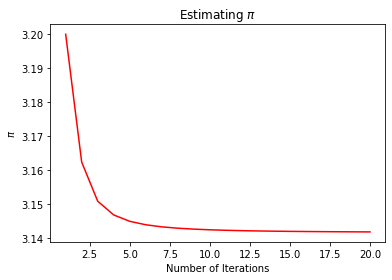

In [9]:
#############################################
#
# Plot a simple plot of PI calculated with
#   different numbers of Reimann Sums.

plt.plot(Ns_for_pi, pi_of_N, "r")
plt.title('Estimating $\pi$')
plt.xlabel("Number of Iterations") 
plt.ylabel("$\pi$"); 

#
#############################################

# Final Section:  On Arrays in Python (Deep Dive -- Indexing Array Ranges in Python)

Remember the comments from above on how python when python loops from 0 to N it's really looping from 0 to N-1?

When migrating from older languages like Fortran or C, you may be used to what is, apparently, called inclusive indexing... because for some reason there wouldn't be a need to give a such a thing specific adjective when you'd think that it wouldn't be so bloody obvious and intuitive to do it any other way.

But Oh No.........

Python, along with a couple other supernew languages, do something different...

Let's first borrow from a commonly used language like MATLAB, or R. (let's assume that we start our indexing with 0 like Python does).

```
strawman := (/ 1, 2, 3, 4, 5 /)
```

Let's ask for the last two values...  Normally we woud intuit that it'd be ...


```
print( strawman(3:4) ) 

(/ 4, 5 /)
```

Now let's do the same thing in Python:

In [10]:
#
# let's make a no-nonsense array
#

strawman = np.array([ 1, 2, 3, 4, 5])
print('strawman[] =', strawman)

strawman[] = [1 2 3 4 5]


In [11]:
#
# and let's pull what we think should be the last two?
#

print('strawman[3:4] =', strawman[3:4])

strawman[3:4] = [4]


Whaaaa?
OK here is what is happening when "slicing," as it's called, an array in Python. Python does something that may be seen to be counterintuitve.
the first index that is requested list or array subset is inclusive
that measn that what you ask for is what you get. You ask for the 0 index, or in this case index #4 when starting at zero, you ask for "3" get that one.
But..
the closing index that is requested from a list or array subset is exclsuive
so when you ask for the subset ending at #5 from zero.. it gives you... #4 from zero.
so if you want number #5 from zero instead of typing "4", you type the next one... "5".

In [12]:
#
# so if you use the way we normally think about it...
#

print('strawman[3:4+1] =', strawman[3:4+1])

# or

print('strawman[3:5] =', strawman[3:5])

strawman[3:4+1] = [4 5]
strawman[3:5] = [4 5]


If you want to go from a array value 4 to the end of the array you *could* do this.  This is similar to NCL...  but as shown here if you look closer there is a lack of consistancy of you forget that the first value *requested* is "inclusive", the second *requested* is exclusive.

In [13]:
print('strawman[  3: ] =',  strawman[ 3:  ]) # second to last their way
print('strawman[  3  ] =',  strawman[   3 ]) # second to last alone
print('strawman[  4  ] =',  strawman[   4 ]) # last alone (first request is inclusive)
print('strawman[  -2 ] =',  strawman[  -2 ]) # second from last
print('strawman[  -1 ] =',  strawman[ -1  ]) # first from last first request is inclusive
print('strawman[-2:-1] =',  strawman[-2:-1]) # the last value is exclusive
print('strawman[-2:  ] =',  strawman[-2:  ]) # how they want you to pull the last 2.

strawman[  3: ] = [4 5]
strawman[  3  ] = 4
strawman[  4  ] = 5
strawman[  -2 ] = 4
strawman[  -1 ] = 5
strawman[-2:-1] = [4]
strawman[-2:  ] = [4 5]


When you [JFGI](http://lmgtfy.com/?q=why+is+the+mother-flipping+python+indexing+inclusive+for+the+first+index+then+exclusive+for+the+second) what why this is the case you get an argument from "elegance."  

Whatever... but still. I prefer the following addage... 

"elegance is skin deep... but intuitive functionality is to the bone"

# Even Deeper Dive! : Symbolics in Python.

Yes you can do a symbolic and analytic solutions in Python.  

It's a little scary at first because unlike Mathcad, when programming in a more traditional environment we don't have a more ["WYSIWIG"](https://en.wikipedia.org/wiki/WYSIWYG) environment.  We get a cross between being able to use "real" variable names like in Matchad with the one-liner typing approach in Excel.

For classwork with university tablets we tend to have students use [Anaconda for Python 3](https://www.anaconda.com/distribution/) which includes the package [sympy](https://www.sympy.org/en/index.html), a symbolic solver.  

You can find some examples of python-play with sympy [here](https://github.com/sympy/sympy/wiki/Quick-examples)

When working with basic python, the results from sympy look "meh."  However they can look rather spiffy in the Jupyter notebook framework.  

Let's try this playing with pi.  For starters let's fetch the sympy library...


In [14]:
################################################################
#
# Import SymPy (Symbolic Python) (we'll grab the functions with
#    a prefix "sym")
#

import sympy as sym

#
################################################################

Now we need to create a variable (or symbol). You can have more than one but today we will just use "_x_".

In [15]:
################################################################
#
# Let's make a x for use in symbolic solutions
#

x = sym.symbols('x')

#
################################################################

Now let's test this with something simple:  Let's do a very simple derivative:  

$$ \frac{d}{dx}\left(x^2 - 3 x + 2 \right) $$

In [16]:

################################################################
#
# Demonstrating how differentiate
#  a very simple math function
#

sym.diff(x**2 - 3 * x + 2, x)

#
################################################################

2*x - 3

or this one (more relevant to what we are doing above with pi!)...

$$ \frac{d}{dx}\left( 4  \arctan{x} \right) $$

(Note that we need to use sympy's version of any math function that you'd otherwise use from the python library where you'd normally do your number-crunching.)

In [17]:
################################################################
#
# Demonstrating how differentiate
#  using a basic math function 
#

sym.diff( 4 * sym.atan(x), x)

#
################################################################

4/(x**2 + 1)

And we can integrate as well... Such as the one from our pi example.

$$ \int {\frac{4}{1 + x^2}}dx  $$

In [18]:
################################################################
#
# Demonstrating how integrate a function 
#

sym.integrate(  4 / (1 + x*x), x)
#
################################################################

4*atan(x)

And we can request specific ranges for our integral!

$$ \int_{0}^{1} {\frac{4}{1 + x^2}}dx  $$

In [19]:
################################################################
#
# Demonstrating how integrate a function 
#   over a range
#

sym.integrate(  4 / (1 + x*x), (x, 0, 1) )

#
################################################################

pi

How about solving for root equations?  Let's try this one!

$$ f(x) = x^2 - 3 x + 2 $$

But remember... what do we do first? 

Yup, we plot it!

Sympy has a separate [plotting library](https://docs.sympy.org/latest/modules/plotting.html) from matplotlib that comes in handy here... You can also zero in on your x-range in a way that is similar to the above calculus integration method!  The default, like Mathcad, is to plot x from -10 to +10.


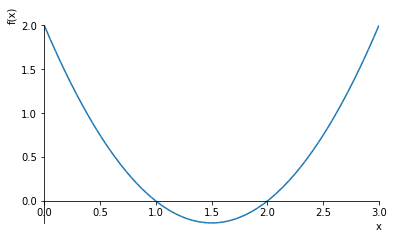

In [20]:
################################################################
#
# Showing how to plot a function using 
#   the Sympy package (and how to plot it
#   over a range where x is bounded between 
#   0 and 3).
#

sym.plotting.plot(x**2 - 3*x + 2, (x, 0, 3) )

#
################################################################

In [21]:
################################################################
#
# Demonstrating the Sym.Solve Function
#

sym.solve(x**2 - 3*x + 2)

#
################################################################

[1, 2]

And we can have a little more fun (if you think flashbacks back to Mrs Mercer's Algebra class is "fun.")

In [22]:
################################################################
#
# Showing-off the Factoring Function
#

sym.factor(x**2 - 3*x + 2)

#
################################################################

(x - 2)*(x - 1)

## Version Information

Finally it's a good idea to have some kind of documentation of what version, operating system and python modules you used in your code.  This helps reviewers and future users to understand how and where you made your script, and by doing so, builds confidence in replicability.

In [23]:
################################################################
#
# Loading Version Information
#

%load_ext version_information
%version_information numpy, sympy, matplotlib, version_information

#
################################################################

Software versions
Python 3.7.3 64bit [Clang 11.0.0 (clang-1100.0.33.12)]
IPython 7.9.0
OS Darwin 19.0.0 x86_64 i386 64bit
numpy 1.17.3
sympy 1.4
matplotlib 3.1.1
version_information 1.0.3
Sat Nov 09 11:45:14 2019 MST